# Computer Vision

## Lab 1


### Imports

- [x] OpenCV: computer vision library (import cv2)
- [x] NumPy: n-dimensional arrays and math (import numpy as np)
- [x] SciPy: scientific computing and stats (import scipy)
- [x] SciKit-image: image processing and color conversion (import skimage)
- [ ] ImageIO: easy image/video reading/writing (import imageio)
- [ ] mpmath: arbitrary precision floating point operations (import mpmath)
- [x] matplotlib: plotting (import matplotlib.pyplot as plt)
- [x] seaborn: matplotlib wrapper (import seaborn as sns)
- [x] Python Image Library: alternative image processing (import PIL)


In [1]:
# Computation
import cv2
import numpy as np
import scipy
import skimage

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Filter Kernels


In [2]:
prewitt_vertical = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_horizontal = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

### Section 2 - Define Images


In [8]:
# RGB
image_35 = np.array(cv2.imread("./assets/image-35.jpg")[:,:,::-1], dtype=np.uint8)
image_83 = np.array(cv2.imread("./assets/image-83.jpg")[:,:,::-1], dtype=np.uint8)
image_110 = np.array(cv2.imread("./assets/image-110.jpg")[:,:,::-1], dtype=np.uint8)

images = [image_35, image_83, image_110]
num_images = len(images)

# Grayscale
grayscale_35 = skimage.color.rgb2gray(image_35)
grayscale_83 = skimage.color.rgb2gray(image_83)
grayscale_110 = skimage.color.rgb2gray(image_110)

grayscales = [grayscale_35, grayscale_83, grayscale_110]
num_grayscales = len(grayscales)

# Masks
mask_35 = np.array(cv2.imread("./assets/mask-35.png")[:,:,::-1], dtype=np.uint8)
mask_83 = np.array(cv2.imread("./assets/mask-83.png")[:,:,::-1], dtype=np.uint8)
mask_110 = np.array(cv2.imread("./assets/mask-110.png")[:,:,::-1], dtype=np.uint8)

masks = [mask_35, mask_83, mask_110]
num_masks = len(masks)

# All
all = images + masks

### Section 3 - Display Images


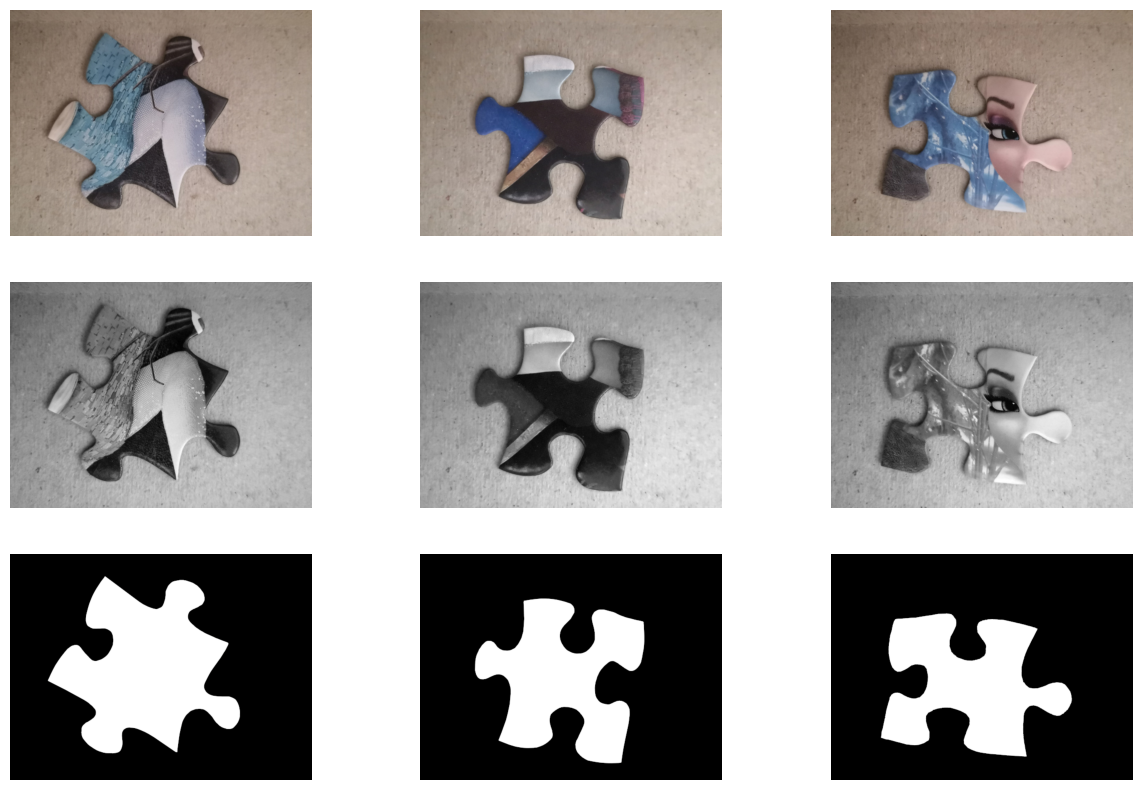

In [12]:
fig = plt.figure(figsize=(num_images * 5, 10))

for image, grayscale, mask, i in zip(images, grayscales, masks, range(num_images)):
    fig.add_subplot(3, num_images, i+1)
    plt.imshow(image)
    plt.axis('off')

    fig.add_subplot(3, num_images, num_images+i+1)
    plt.imshow(grayscale, cmap="gray")
    plt.axis('off')

    fig.add_subplot(3, 3, 2*num_images+i+1)
    plt.imshow(mask)
    plt.axis('off')

### Section 4 - Descriptive Statistics


In [ ]:
rows = [
    "width",
    "height",
    "pixels",
    "black pixels",
    "white pixels",
    "gray min",
    "gray max",
    "puzzle min",
    "puzzle max",
    "bg min",
    "bg max",
    "gray mean",
    "puzzle mean",
    "bg mean",
    "puzzle var",
    "bg var",
    "r intensities",
    "g intensities",
    "b intensities",
    "mask r intensities",
    "mask g intensities",
    "mask b intensities",
    "mean intensities",
    "gray intensities",
    "hsv intensities",
    "mean intensities (kde)",
    "gray intensities (kde)",
    "hsv intensities (kde)",
]

#### Questions 1, 2 & 3


In [5]:
def print_dimensions(image):
    name = os.path.basename(image.filename)
    print(name)

    print(f"1. {image.width} (width)")
    print(f"2. {image.height} (height)")
    print(f"3. {image.width * image.height} pixels")

    print()


perform_function_on_defaults(print_dimensions)


image-35.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels

image-83.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels

image-110.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels



#### Questions 4 & 5


In [6]:
def print_pixel_counts(image, mask):
    name = os.path.basename(image.filename)
    print(name)

    mask_arr = np.asarray(mask.convert(mode="1"))
    unique, counts = np.unique(mask_arr, return_counts=True)

    counts_dict = dict(zip(unique, counts))

    print(f"4. {counts_dict[False]} black pixels")
    print(f"5. {counts_dict[True]} white pixels")

    print()


perform_function_on_defaults(print_pixel_counts)


image-35.jpg
4. 195470 black pixels
5. 74530 white pixels

image-83.jpg
4. 209682 black pixels
5. 60318 white pixels

image-110.jpg
4. 209196 black pixels
5. 60804 white pixels



#### Question 6 & 7


In [7]:
def print_min_max(image):
    name = os.path.basename(image.filename)
    print(name)

    grayscale = skimage.color.rgb2gray(image)

    print(f"6. {np.amin(grayscale)} (min)")
    print(f"7. {np.amax(grayscale)} (max)")

    print()


perform_function_on_defaults(print_min_max)


image-35.jpg
6. 0.08399686274509804 (min)
7. 0.8985443137254902 (max)

image-83.jpg
6. 0.10333686274509803 (min)
7. 0.8971980392156863 (max)

image-110.jpg
6. 0.05205882352941176 (min)
7. 0.8501392156862745 (max)



#### Question 8 & 9


In [8]:
def print_min_max_puzzle_bg(image, mask):
    name = os.path.basename(image.filename)
    print(name)

    image_arr = np.asarray(skimage.color.rgb2gray(image))
    mask_arr = np.asarray(mask.convert(mode="1"))

    image_puzzle = image_arr[mask_arr == True]
    print(
        f"8. {np.amin(image_puzzle)} (min) and {np.amax(image_puzzle)} (max) - puzzle")

    image_bg = image_arr[mask_arr == False]
    print(f"9. {np.amin(image_bg)} (min) and {np.amax(image_bg)} (max) - background")

    print()


perform_function_on_defaults(print_min_max_puzzle_bg)


image-35.jpg
8. 0.08399686274509804 (min) and 0.8985443137254902 (max) - puzzle
9. 0.14756823529411764 (min) and 0.7937560784313724 (max) - background

image-83.jpg
8. 0.10333686274509803 (min) and 0.8971980392156863 (max) - puzzle
9. 0.18647843137254905 (min) and 0.8673949019607844 (max) - background

image-110.jpg
8. 0.05205882352941176 (min) and 0.8501392156862745 (max) - puzzle
9. 0.11280980392156864 (min) and 0.7903247058823529 (max) - background



#### Question 10


In [9]:
def mean_intensity(image):
    name = os.path.basename(image.filename)
    print(name)

    image_arr = np.asarray(skimage.color.rgb2gray(image))
    print(f"10. {np.mean(image_arr)} (mean)")

    print()


perform_function_on_defaults(mean_intensity)


image-35.jpg
10. 0.5384709828395062 (mean)

image-83.jpg
10. 0.5664833728249818 (mean)

image-110.jpg
10. 0.5367658629745824 (mean)



#### Question 11, 12, 13 & 14


In [10]:
def mean_intensity_puzzle_bg(image, mask):
    name = os.path.basename(image.filename)
    print(name)

    image_arr = np.asarray(skimage.color.rgb2gray(image))
    mask_arr = np.asarray(mask.convert(mode="1"))

    image_puzzle = image_arr[mask_arr == True]
    image_bg = image_arr[mask_arr == False]

    print(f"11. {np.mean(image_puzzle)} (mean) - puzzle")
    print(f"12. {np.mean(image_bg)} (mean) - background")
    print(f"13. {np.var(image_puzzle)} (variance) - puzzle")
    print(f"14. {np.var(image_bg)} (variance) - background")

    print()


perform_function_on_defaults(mean_intensity_puzzle_bg)


image-35.jpg
11. 0.44184835546154594 (mean) - puzzle
12. 0.5753118505863695 (mean) - background
13. 0.03806606384291545 (variance) - puzzle
14. 0.00784590844729906 (variance) - background

image-83.jpg
11. 0.3251410136342743 (mean) - puzzle
12. 0.635908924000882 (mean) - background
13. 0.02979163158696951 (variance) - puzzle
14. 0.010540964523995569 (variance) - background

image-110.jpg
11. 0.462364174467366 (mean) - puzzle
12. 0.5583911343372892 (mean) - background
13. 0.027336018392854017 (variance) - puzzle
14. 0.008967652488759194 (variance) - background



#### Question 15, 16 & 17


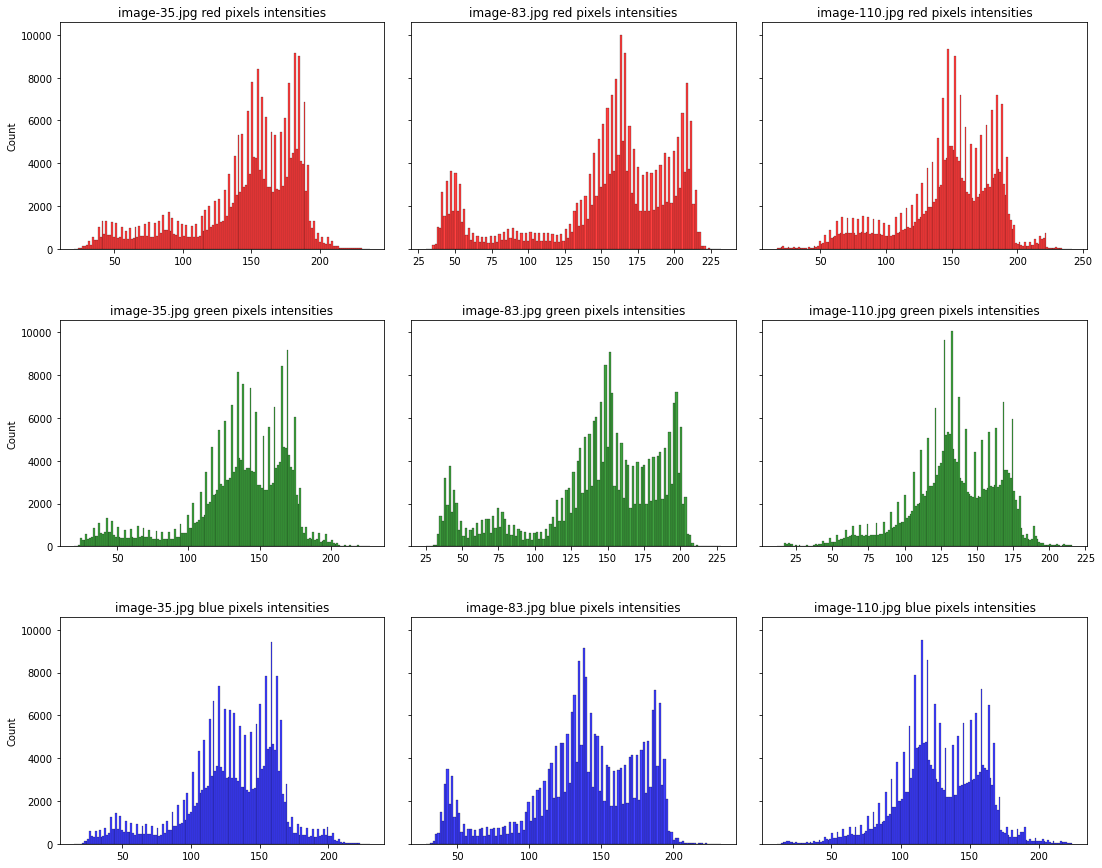

In [11]:
fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)


def display_channel_histograms(image, _mask, i):
    name = os.path.basename(image.filename)
    image_arr = np.asarray(image)

    red_pixels = image_arr[:, :, 0].flatten()
    sns.histplot(
        ax=axes[0, i],
        data=red_pixels,
        color="r"
    ).set(
        title=f"{name} red pixels intensities"
    )

    green_pixels = image_arr[:, :, 1].flatten()
    sns.histplot(
        ax=axes[1, i],
        data=green_pixels,
        color="g"
    ).set(
        title=f"{name} green pixels intensities"
    )

    blue_pixels = image_arr[:, :, 2].flatten()
    sns.histplot(
        ax=axes[2, i],
        data=blue_pixels,
        color="b"
    ).set(
        title=f"{name} blue pixels intensities"
    )


perform_function_on_defaults(display_channel_histograms)


#### Question 18


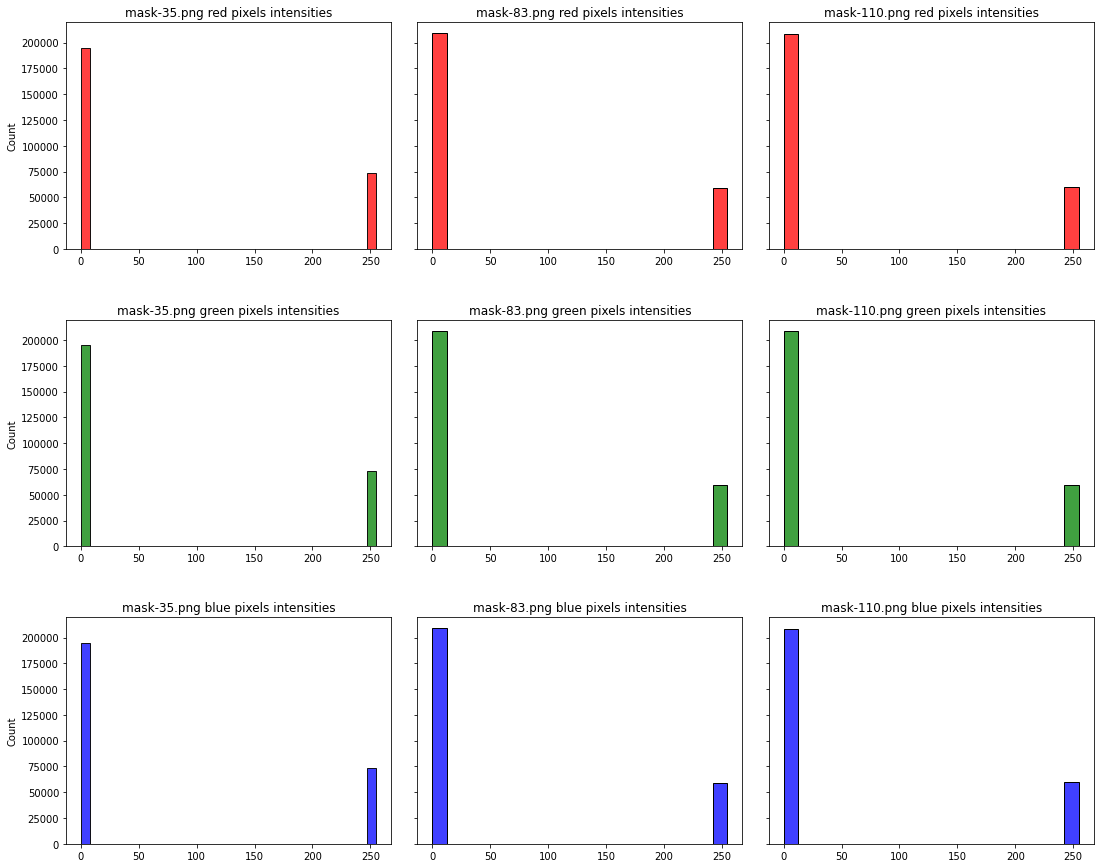

In [12]:
fig, axes = plt.subplots(3, num_masks, sharey=True)

fig.set_figwidth(5 * num_masks)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)


def display_mask_channel_histograms(_image, mask, i):
    name = os.path.basename(mask.filename)
    mask_arr = np.asarray(mask)

    red_pixels = mask_arr[:, :, 0].flatten()
    sns.histplot(
        ax=axes[0, i],
        data=red_pixels,
        color="r"
    ).set(
        title=f"{name} red pixels intensities"
    )

    green_pixels = mask_arr[:, :, 1].flatten()
    sns.histplot(
        ax=axes[1, i],
        data=green_pixels,
        color="g"
    ).set(
        title=f"{name} green pixels intensities"
    )

    blue_pixels = mask_arr[:, :, 2].flatten()
    sns.histplot(
        ax=axes[2, i],
        data=blue_pixels,
        color="b"
    ).set(
        title=f"{name} blue pixels intensities"
    )


perform_function_on_defaults(display_mask_channel_histograms)


#### Question 19, 20 & 21


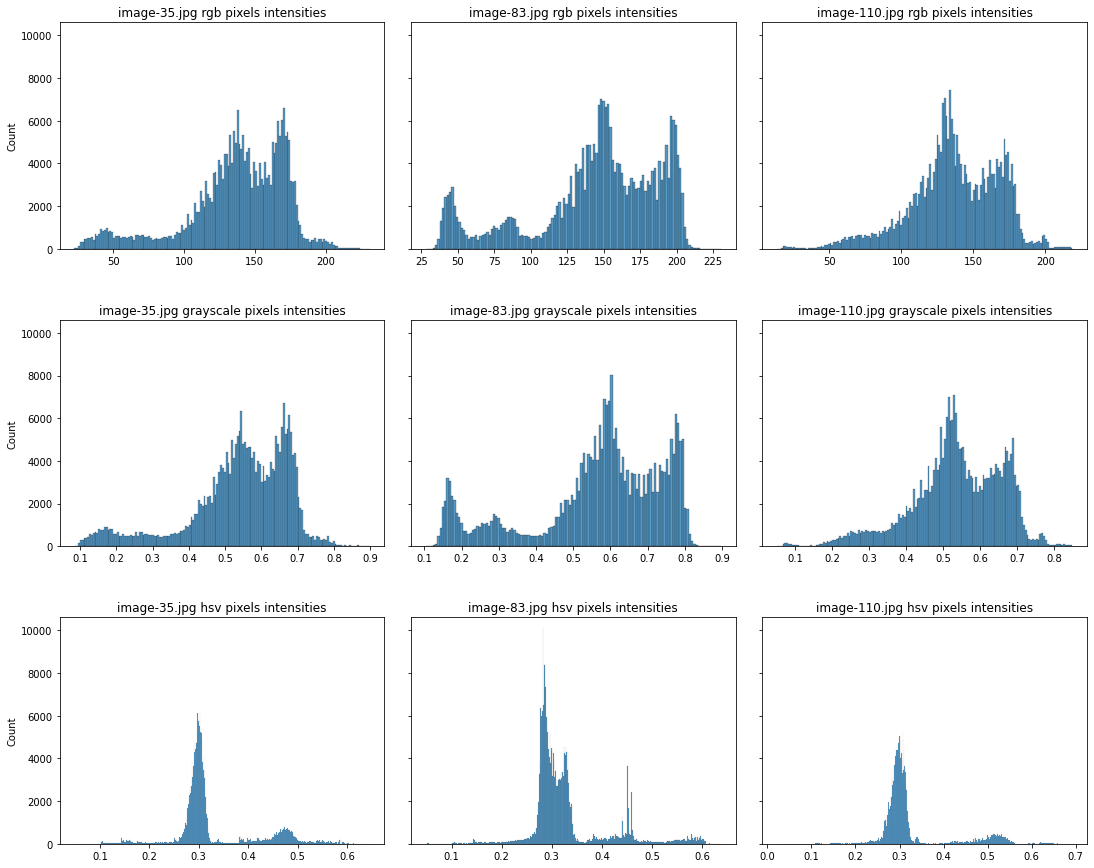

In [13]:
fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)


def display_pixel_intensity_histograms(image, _mask, i):
    name = os.path.basename(image.filename)
    image_arr = np.asarray(image)

    image_intensities = np.mean(image_arr, 2).flatten()
    sns.histplot(
        ax=axes[0, i],
        data=image_intensities
    ).set(
        title=f"{name} rgb pixels intensities"
    )

    grayscale = skimage.color.rgb2gray(image_arr)
    grayscale_arr = np.asarray(grayscale).flatten()
    sns.histplot(
        ax=axes[1, i],
        data=grayscale_arr
    ).set(
        title=f"{name} grayscale pixels intensities"
    )

    hsv = skimage.color.rgb2hsv(image_arr)
    hsv_arr = np.mean(hsv, 2).flatten()
    sns.histplot(
        ax=axes[2, i],
        data=hsv_arr
    ).set(
        title=f"{name} hsv pixels intensities"
    )


perform_function_on_defaults(display_pixel_intensity_histograms)


#### Question 22


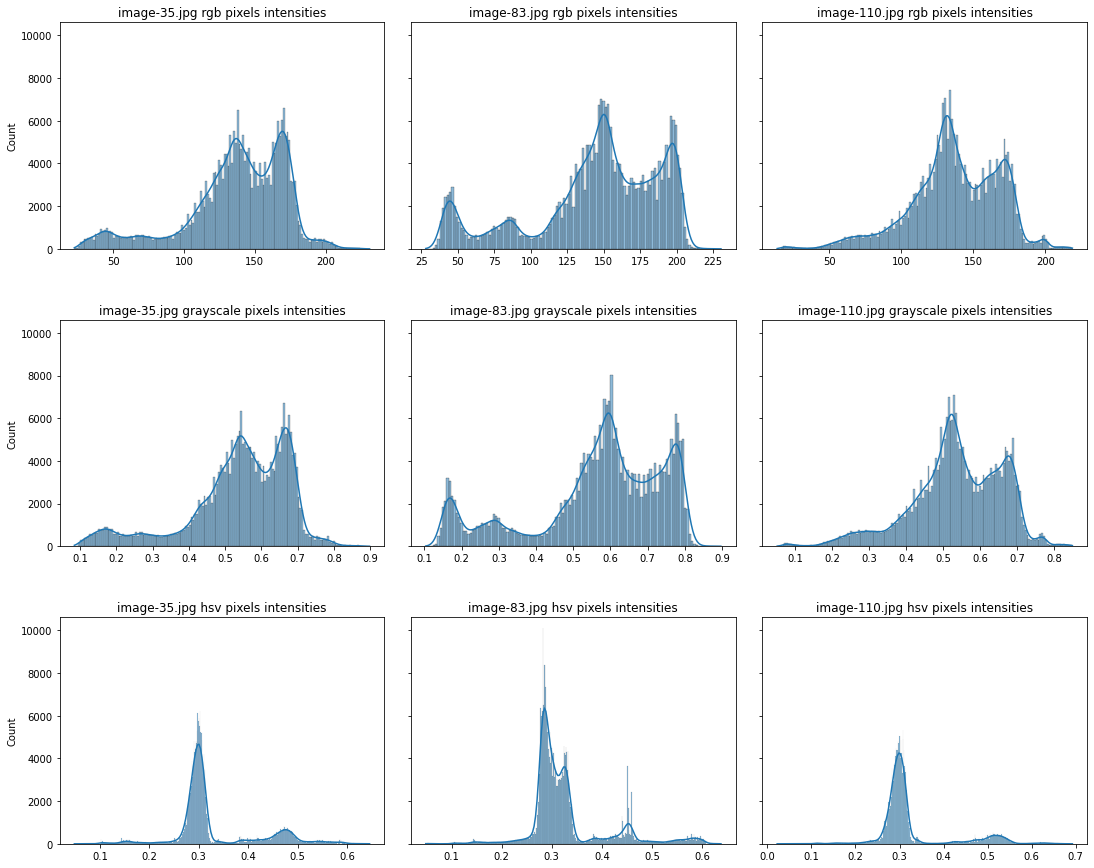

In [14]:
fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)


def display_pixel_intensity_histograms_with_kernel_density_estimations(image, _mask, i):
    name = os.path.basename(image.filename)
    image_arr = np.asarray(image)

    image_intensities = np.mean(image_arr, 2).flatten()
    sns.histplot(
        ax=axes[0, i],
        data=image_intensities,
        kde=True
    ).set(
        title=f"{name} rgb pixels intensities"
    )

    grayscale = skimage.color.rgb2gray(image_arr)
    grayscale_arr = np.asarray(grayscale).flatten()
    sns.histplot(
        ax=axes[1, i],
        data=grayscale_arr,
        kde=True
    ).set(
        title=f"{name} grayscale pixels intensities"
    )

    hsv = skimage.color.rgb2hsv(image_arr)
    hsv_arr = np.mean(hsv, 2).flatten()
    sns.histplot(
        ax=axes[2, i],
        data=hsv_arr,
        kde=True
    ).set(
        title=f"{name} hsv pixels intensities"
    )


perform_function_on_defaults(display_pixel_intensity_histograms_with_kernel_density_estimations)

### Section 5 - Bonus


#### Question 1


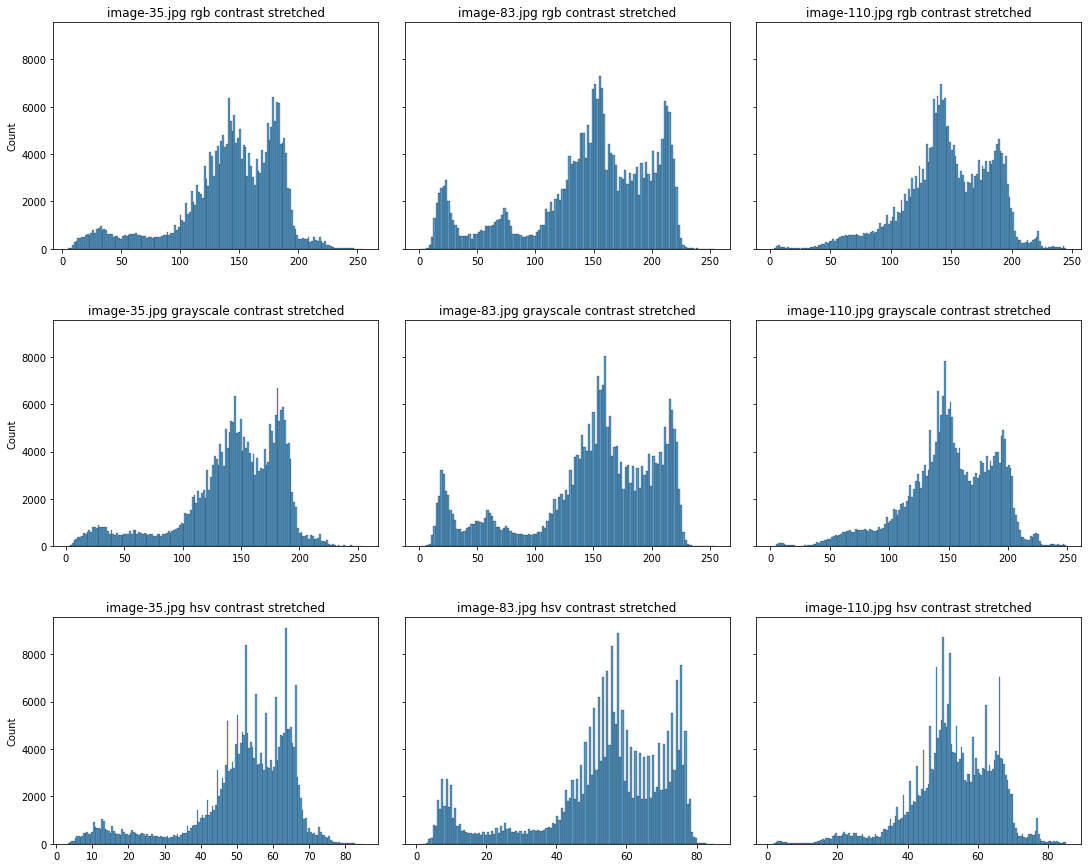

In [15]:
def channel_contrast_stretch(channel):
    channel_min, channel_max = np.amin(channel), np.amax(channel)
    return (channel - channel_min) / (channel_max - channel_min)

fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)

def contrast_stretch(image, _mask, i):
    name = os.path.basename(image.filename)

    image_arr = np.asarray(image) / 255
    
    image_stretched = np.zeros(image_arr.shape)
    
    image_stretched[:, :, 0] = channel_contrast_stretch(image_arr[:, :, 0])
    image_stretched[:, :, 1] = channel_contrast_stretch(image_arr[:, :, 1])
    image_stretched[:, :, 2] = channel_contrast_stretch(image_arr[:, :, 2])
    
    image_stretched = image_stretched * 255
    
    image_intensities = np.mean(image_stretched, 2).flatten()
    sns.histplot(
        ax=axes[0, i],
        data=image_intensities
    ).set(
        title=f"{name} rgb contrast stretched"
    )

    grayscale = skimage.color.rgb2gray(image_stretched)
    grayscale_arr = np.asarray(grayscale).flatten()
    sns.histplot(
        ax=axes[1, i],
        data=grayscale_arr
    ).set(
        title=f"{name} grayscale contrast stretched"
    )

    hsv = skimage.color.rgb2hsv(image_stretched)
    hsv_arr = np.mean(hsv, 2).flatten()
    sns.histplot(
        ax=axes[2, i],
        data=hsv_arr
    ).set(
        title=f"{name} hsv contrast stretched"
    )

perform_function_on_defaults(contrast_stretch)


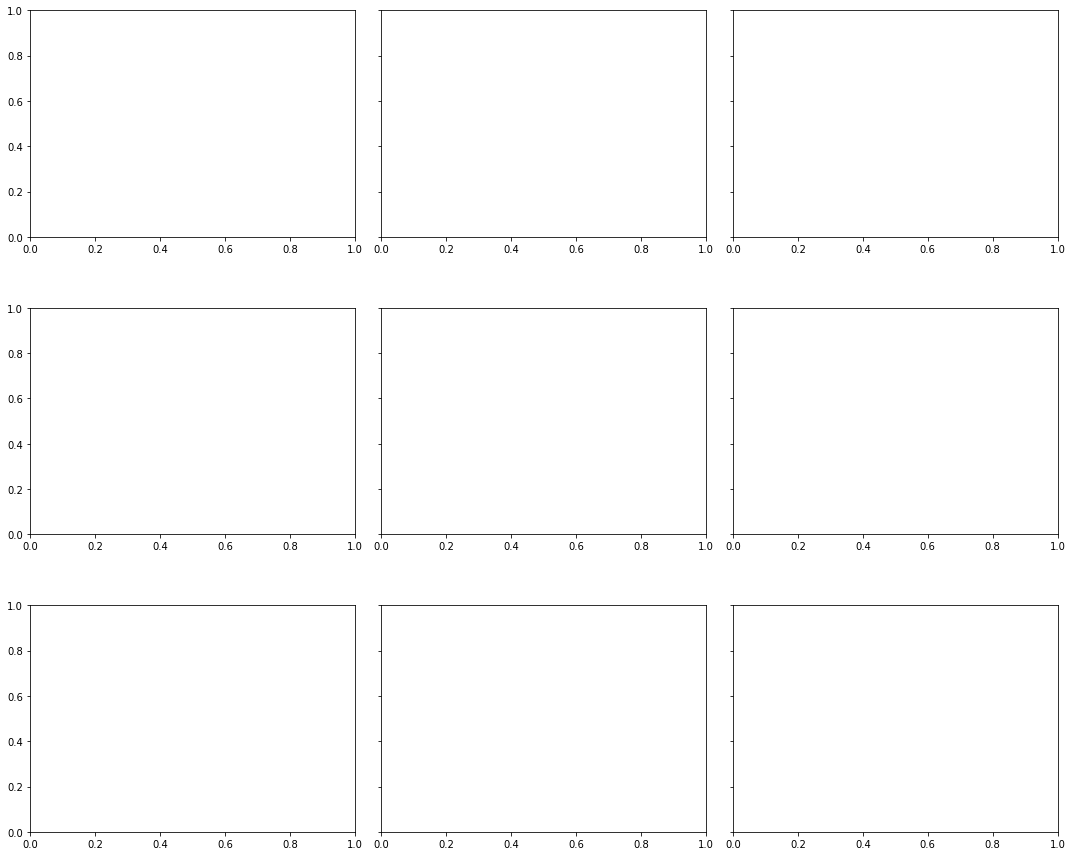

In [16]:
def channel_equalization(channel):
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    normalized = cdf * hist.max() / cdf.max()
    return normalized

fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)

def histogram_equalization(image, _mask, i):
    name = os.path.basename(image.filename)

    image_arr = np.asarray(image)
    
    equalized_red = channel_equalization(image_arr[:, :, 0])
    equalized_green = channel_equalization(image_arr[:, :, 1])
    equalized_blue = channel_equalization(image_arr[:, :, 2])
    

perform_function_on_defaults(histogram_equalization)

### Section 6


#### Question 1


In [17]:
def convolve(image_arr: np_type.NDArray, kernel: np_type.NDArray):
    """Apply a convolution to an image based on given kernel and padding type

    Args:
        image_arr (NDArray): N X M Image
        kernel (NDArray): _description_

    Returns:
        new_image_arr (NDArray): N X M Image with applied filter
    """
    kernel = np.rot90(kernel, k=2)
    kernel_h, kernel_w = kernel.shape
    pad_h, pad_w = kernel_h // 2, kernel_w // 2
    
    height, width = image_arr.shape[0], image_arr.shape[1]
    channels = 1 if len(image_arr.shape) < 3 else image_arr.shape[2]
    
    pad_width = ((pad_h, pad_h), (pad_w, pad_w)) if channels == 1 else ((pad_h, pad_h), (pad_w, pad_w), (0, 0))
    image_pad = np.pad(image_arr, pad_width=pad_width)
    
    new_image = np.zeros(image_arr.shape)
    for i in range(height):
        for j in range(width):
            if channels == 1:
                new_image[i, j] = (image_pad[i:i+kernel_h, j:j+kernel_w] * kernel).sum()
                continue
                
            new_image[i, j] =  [
                (image_pad[i:i+kernel_h, j:j+kernel_w, i] * kernel).sum() for i in range(channels)
            ]
            
    return new_image

In [18]:
# Test Convolve

with PIL.Image.open(f"./assets/{image_35}") as image:
        rgb_image = image.convert(mode="RGB")
        image_arr = np.asarray(rgb_image) / 255
        
        print(image_arr[0:3, 0:3,0])
        
        #lc = convolve(image_arr, laplacian)
        #ll = cv2.Laplacian(image_arr, ddepth=-1)
        #print(np.array_equal(lc, ll))
        #print(lc)
        #print(ll)

[[0.44313725 0.44313725 0.43529412]
 [0.44705882 0.44705882 0.43137255]
 [0.45490196 0.45490196 0.43921569]]


#### Question 2


In [19]:
def get_image_features(image_name):
    features = []

    with PIL.Image.open(f"./assets/{image_name}") as image:
        rgb_image = image.convert(mode="RGB")
        
        # RGB
        image_arr = np.asarray(rgb_image) / 255
        features.extend(image_arr.reshape(3, image_arr.shape[0], -1))

        # HSV
        image_hsv = skimage.color.rgb2hsv(image_arr)
        features.extend(image_hsv.reshape(3, image_hsv.shape[0], -1))

        # Prewitt Vertical
        pv = convolve(image_arr, prewitt_vertical)
        features.extend(pv.reshape(3, pv.shape[0], -1))

        # Prewitt Horizontal
        ph = convolve(image_arr, prewitt_horizontal)
        features.extend(ph.reshape(3, ph.shape[0], -1))
        
        # Laplacian
        l = convolve(image_arr, laplacian)
        features.extend(l.reshape(3, l.shape[0], -1))
        
    return np.asarray(features)

In [20]:
training_features = get_image_features(image_35)

In [21]:
for i in range(len(training_features)):
    print(training_features[i].min(), training_features[i].max())

0.058823529411764705 0.8980392156862745
0.08235294117647059 0.8274509803921568
0.10980392156862745 0.9254901960784314
0.0 0.9916666666666667
0.0 0.9833333333333334
0.0 0.9833333333333334
-0.14509803921568637 1.8823529411764706
-0.14509803921568637 1.8823529411764706
-0.14509803921568637 1.8823529411764706
-1.5372549019607842 1.1333333333333333
-1.5372549019607842 1.1333333333333333
-1.5372549019607842 1.1333333333333333
-0.14509803921568631 1.1647058823529413
-0.14509803921568631 1.1647058823529413
-0.14509803921568631 1.1647058823529413


#### Question 3

In [22]:
features_mean = np.mean(training_features, axis=(1,2))
print("mean", features_mean.shape)

features_cov = np.cov(training_features.reshape(15, 270000))
print("cov", features_cov.shape)

mean (15,)
cov (15, 15)


#### Question 4

In [23]:
validation_features = get_image_features(image_83)

In [24]:
normal_dist = scipy.stats.multivariate_normal(mean=features_mean, cov=features_cov)
normal_pdf = normal_dist.pdf(validation_features.reshape(450, 600, 15))

fig = plt.figure(figsize=(num_images * 5, 15))

with PIL.Image.open(f"./assets/{image_83}") as image:
    fig.add_subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(image_83)

fig.add_subplot(1, 3, 2)
plt.imshow(normal_pdf)
plt.axis('off')
plt.title(f"{image_83} (inference)")

with PIL.Image.open(f"./assets/{mask_83}") as mask:
    fig.add_subplot(1, 3, 3)
    plt.imshow(mask)
    plt.axis('off')
    plt.title(mask_83)

LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

#### Question 5

In [ ]:
def get_image_features_with_hsv(image_name):
    features = get_image_features(image_name).tolist()

    with PIL.Image.open(f"./assets/{image_name}") as image:
        # RGB
        rgb_image = image.convert(mode="RGB")
        image_arr = np.asarray(rgb_image)

        # HSV
        image_hsv = skimage.color.rgb2hsv(image_arr)
        image_hue = image_hsv[:, :, 0]
        image_saturation = image_hsv[:, :, 1]
        image_value = image_hsv[:, :, 2]

        # Prewitt Vertical
        prewitt_vertical_image_hue = convolve(
            image_hue,
            prewitt_vertical,
            
        )
        prewitt_vertical_image_saturation = convolve(
            image_saturation,
            prewitt_vertical,
            
        )
        prewitt_vertical_image_value = convolve(
            image_value,
            prewitt_vertical,
            
        )
        features.extend([prewitt_vertical_image_hue, prewitt_vertical_image_saturation, prewitt_vertical_image_value])

        # Prewitt Horizontal
        prewitt_horizontal_image_hue = convolve(
            image_hue,
            prewitt_horizontal,
            
        )
        prewitt_horizontal_image_saturation = convolve(
            image_saturation,
            prewitt_horizontal,
            
        )
        prewitt_horizontal_image_value = convolve(
            image_value,
            prewitt_horizontal,
            
        )
        features.extend([prewitt_horizontal_image_hue, prewitt_horizontal_image_saturation, prewitt_horizontal_image_value])
    
        # Laplacian
        laplacian_image_hue = convolve(
            image_hue,
            laplacian,
            
        )
        laplacian_image_saturation = convolve(
            image_saturation,
            laplacian,
            
        )
        laplacian_image_value = convolve(
            image_value,
            laplacian,
            
        )
        features.extend([laplacian_image_hue, laplacian_image_saturation, laplacian_image_value])
        
    return np.asarray(features)

In [ ]:
training_features_with_hsv = get_image_features_with_hsv(image_35)

In [ ]:
inference_features_with_hsv = get_image_features_with_hsv(image_83)

In [ ]:
features_with_hsv_mean = np.mean(training_features_with_hsv, axis=(1,2))
print("mean", features_with_hsv_mean.shape)

features_with_hsv_cov = np.cov(training_features_with_hsv.reshape(24, 270000))
print("cov", features_with_hsv_cov.shape)

In [ ]:
normal_dist_with_hsv = scipy.stats.multivariate_normal(mean=features_with_hsv_mean, cov=features_with_hsv_cov)
normal_pdf_with_hsv = normal_dist_with_hsv.pdf(inference_features_with_hsv.reshape(450, 600, 24))

fig = plt.figure(figsize=(num_images * 5, 15))

with PIL.Image.open(f"./assets/{image_83}") as image:
    fig.add_subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(image_83)

fig.add_subplot(1, 3, 2)
plt.imshow(normal_pdf_with_hsv)
plt.axis('off')
plt.title(f"{image_83} (inference with hsv features)")

with PIL.Image.open(f"./assets/{mask_83}") as mask:
    fig.add_subplot(1, 3, 3)
    plt.imshow(mask)
    plt.axis('off')
    plt.title(mask_83)

print(scipy.stats.mvn.mvnun(-np.inf, 1, normal_pdf_with_hsv))

#### Question 6

#### Question 7